In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("../../Final Project/train.csv")

/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_43914/816553336.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../Final Project/train.csv")


In [3]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,90015,10139,Langep,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18940,36585.12,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0


## Missing values

In [4]:
# count missing values in all columns of dataset

df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [5]:
"""
Name
Monthly inhand salary -> OK
type of loan
num of delayed payments
num credit inquiries
credit history age
amount invested monthly
monthly balance

"""

'\nName\nMonthly inhand salary -> OK\ntype of loan\nnum of delayed payments\nnum credit inquiries\ncredit history age\namount invested monthly\nmonthly balance\n\n'

In [6]:
# making a dataset only with columns containing NA

columns_na = df[["Name", "Monthly_Inhand_Salary", "Type_of_Loan", "Num_of_Delayed_Payment", "Num_Credit_Inquiries", "Credit_History_Age", "Amount_invested_monthly", "Monthly_Balance", "Credit_Score"]]
columns_na.isna().sum()

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

## Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:


# Sort the DataFrame by 'Customer_ID' and any other relevant columns
df = df.sort_values(by=['Customer_ID', "Monthly_Inhand_Salary"])

# Forward fill missing values in the 'monthly_inhad_salary' column within each group of 'Customer_ID'
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill')

# Backward fill for any remaining missing values at the beginning of each group
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='bfill')

# Reset index if needed
df = df.reset_index(drop=True)


/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_43914/295826823.py:5: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill')
/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_43914/295826823.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill')
/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_43914/295826823.py:8: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill

In [9]:
print(df["Monthly_Inhand_Salary"].isna().sum())
df.sort_values(by=['Customer_ID', "Monthly_Inhand_Salary"])

0


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1628a,CUS_0x1000,January,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,26.612093,10 Years and 2 Months,Yes,42.941090,244.75028300769162,Low_spent_Large_value_payments,252.9247932365056,Standard
1,0x1628c,CUS_0x1000,March,Alistair Barrf,17_,913-74-1218,Lawyer,30625.94_,2706.161667,6,...,Bad,1562.91,38.285928,10 Years and 4 Months,Yes,42.941090,109.05651876486915,High_spent_Medium_value_payments,368.61855747932816,Poor
2,0x1628d,CUS_0x1000,April,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.843081,10 Years and 5 Months,Yes,42.941090,87.90990881495769,!@9#%8,419.7651674292397,Poor
3,0x1628e,CUS_0x1000,May,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,32.330508,10 Years and 6 Months,Yes,42.941090,191.8347674990596,Low_spent_Large_value_payments,305.8403087451377,Poor
4,0x1628f,CUS_0x1000,June,Alistair Barrf,18,913-74-1218,Lawyer,30625.94,2706.161667,6,...,Bad,1562.91,40.082272,10 Years and 7 Months,Yes,42.941090,114.80240059146288,High_spent_Small_value_payments,372.87267565273436,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25afd,CUS_0xffd,April,Damouniq,29,832-88-8320,Scientist,41398.44,3749.870000,8,...,_,1701.88,36.384516,18 Years and 5 Months,Yes,182.976649,234.3549398533252,!@9#%8,247.655411,Standard
99996,0x25afe,CUS_0xffd,May,Damouniq,29,832-88-8320,_______,41398.44,3749.870000,8,...,Standard,1701.88,26.166508,18 Years and 6 Months,Yes,182.976649,104.6294735081563,High_spent_Medium_value_payments,337.380877,Standard
99997,0x25b00,CUS_0xffd,July,Damouniq,30_,832-88-8320,Scientist,41398.44_,3749.870000,8,...,Standard,1701.88,33.916363,18 Years and 8 Months,Yes,182.976649,257.98969352901736,High_spent_Small_value_payments,194.020657,Good
99998,0x25b01,CUS_0xffd,August,Damouniq,30,832-88-8320,Scientist,41398.44,3749.870000,8,...,Standard,1701.88,39.916655,18 Years and 9 Months,Yes,182.976649,42.57571978536272,High_spent_Large_value_payments,389.434631,Good


Fill missing names by existing values

In [10]:
# Sort the DataFrame by 'Customer_ID' and any other relevant columns
df = df.sort_values(by=['Customer_ID', "Name"])

# Forward fill missing values in the 'monthly_inhad_salary' column within each group of 'Customer_ID'
df['Name'] = df.groupby('Customer_ID')['Name'].fillna(method='ffill')

# Backward fill for any remaining missing values at the beginning of each group
df['Name'] = df.groupby('Customer_ID')['Name'].fillna(method='bfill')

# Reset index if needed
df = df.reset_index(drop=True)

/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_43914/333661202.py:5: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['Name'] = df.groupby('Customer_ID')['Name'].fillna(method='ffill')
/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_43914/333661202.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Name'] = df.groupby('Customer_ID')['Name'].fillna(method='ffill')
/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_43914/333661202.py:8: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['Name'] = df.gr

In [11]:
# Sort the DataFrame by 'Customer_ID' and any other relevant columns
df = df.sort_values(by=['Customer_ID', "Occupation"])

# Forward fill missing values in the 'monthly_inhad_salary' column within each group of 'Customer_ID'
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].fillna(method='ffill')

# Backward fill for any remaining missing values at the beginning of each group
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].fillna(method='bfill')

# Reset index if needed
df = df.reset_index(drop=True)

/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_43914/339956051.py:5: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['Occupation'] = df.groupby('Customer_ID')['Occupation'].fillna(method='ffill')
/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_43914/339956051.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Occupation'] = df.groupby('Customer_ID')['Occupation'].fillna(method='ffill')
/var/folders/yc/k6jwrlhs0gldx0wl0rtkrrxh0000gn/T/ipykernel_43914/339956051.py:8: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna inst

In [12]:
# clean Age column by removing _ symbol

df["Age"]=df["Age"].str.replace("_","")


In [13]:
# transform Age to numeric values 

df["Age"] = pd.to_numeric(df["Age"],errors='coerce')
df["Age"].describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

In [14]:
# we have a specific case here: for one client we have several lines, and one of values can be super weird
# for example, Paul has Age values as 26, 26, 26, 1891, 27
# we want to replace the weird value by the median

# replace extreme values by median ones

df["Age"] = df.groupby(["Customer_ID"])["Age"].transform(lambda x: x.median())
df["Age"].describe()

count    100000.000000
mean         33.312560
std          10.763924
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

In [15]:
df["Annual_Income"] = df["Annual_Income"].str.replace("_","")
df["Annual_Income"] = df.Annual_Income.astype(float)

In [16]:
df["Annual_Income"].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [17]:
df["Occupation"] = df["Occupation"].apply(lambda x: 'Unknown' if x == '_______' else x)
df["Occupation"].value_counts()

Occupation
Unknown          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [18]:
df[["Age", "Occupation", "Annual_Income", "Credit_Score"]].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,100000.0,NaN,NaN,NaN,33.31256,10.763924,14.0,24.0,33.0,42.0,56.0
Occupation,100000,16,Unknown,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000.0,NaN,NaN,NaN,176415.701298,1429618.051414,7005.93,19457.5,37578.61,72790.92,24198062.0
Credit_Score,100000,3,Standard,53174,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df["Annual_Income"] = df.groupby(["Customer_ID"])["Annual_Income"].transform(lambda x: x.median())
print(df["Annual_Income"].median())
df["Annual_Income"].describe()


36999.705


count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

## Correlation matrix

# !!! ADDITIONAL TRANSFORMATIONS

In [20]:
df["Delay_from_due_date"] = df.groupby(["Customer_ID"])["Delay_from_due_date"].transform(lambda x: x.median())
print(df["Delay_from_due_date"].median())
df["Delay_from_due_date"].describe()

18.0


count    100000.00000
mean         21.06252
std          14.76185
min          -2.00000
25%          10.00000
50%          18.00000
75%          28.00000
max          62.50000
Name: Delay_from_due_date, dtype: float64

In [21]:
df["Num_Bank_Accounts"] = df.groupby(["Customer_ID"])["Num_Bank_Accounts"].transform(lambda x: x.median())
print(df["Num_Bank_Accounts"].median())
df["Num_Bank_Accounts"].describe()

5.0


count    100000.000000
mean          5.369600
std           2.592987
min          -1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.500000
Name: Num_Bank_Accounts, dtype: float64

In [22]:
df["Num_Credit_Card"] = df.groupby(["Customer_ID"])["Num_Credit_Card"].transform(lambda x: x.median())
print(df["Num_Credit_Card"].median())
df["Num_Credit_Card"].describe()

5.0


count    100000.000000
mean          5.534640
std           2.066834
min           0.500000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64

In [23]:
df["Interest_Rate"] = df.groupby(["Customer_ID"])["Interest_Rate"].transform(lambda x: x.median())
print(df["Interest_Rate"].median())
df["Interest_Rate"].describe()

13.0


count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64

In [24]:
df["Num_Credit_Inquiries"] = df.groupby(["Customer_ID"])["Num_Credit_Inquiries"].transform(lambda x: x.median())
print(df["Num_Credit_Inquiries"].median())
df["Num_Credit_Inquiries"].describe()

5.0


count    100000.000000
mean          5.794600
std           3.831618
min           0.000000
25%           3.000000
50%           5.000000
75%           8.500000
max          17.000000
Name: Num_Credit_Inquiries, dtype: float64

In [25]:
df["Credit_Utilization_Ratio"] = df.groupby(["Customer_ID"])["Credit_Utilization_Ratio"].transform(lambda x: x.median())
print(df["Credit_Utilization_Ratio"].median())
df["Credit_Utilization_Ratio"].describe()

32.312731651890616


count    100000.000000
mean         32.302328
std           2.722979
min          23.698861
25%          30.346087
50%          32.312732
75%          34.196183
max          43.774821
Name: Credit_Utilization_Ratio, dtype: float64

In [26]:
df["Total_EMI_per_month"] = df.groupby(["Customer_ID"])["Total_EMI_per_month"].transform(lambda x: x.median())
print(df["Total_EMI_per_month"].median())
df["Total_EMI_per_month"].describe()

66.91501714279147


count    100000.000000
mean        109.924806
std         236.225101
min           0.000000
25%          29.524253
50%          66.915017
75%         148.099519
max       21627.117104
Name: Total_EMI_per_month, dtype: float64

In [27]:
# df.to_csv('/Users/annaborodina/Desktop/Final Project/data.csv', index=False)

In [28]:
# Select columns with numerical data

num_columns = df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Credit_Score']]

In [29]:
# transform credit score from text labels into numbers (3 = Good, 2 = Standard, 1 = Poor)

num_columns2 = num_columns.copy()
num_columns2["Credit_Score"] = num_columns["Credit_Score"].apply(lambda x: '1' if x == 'Poor' else x)
num_columns2["Credit_Score"] = num_columns2["Credit_Score"].apply(lambda x: '2' if x == 'Standard' else x)
num_columns2["Credit_Score"] = num_columns2["Credit_Score"].apply(lambda x: '3' if x == 'Good' else x)


num_columns2.head()
num_columns2["Credit_Score"].value_counts()


Credit_Score
2    53174
1    28998
3    17828
Name: count, dtype: int64

In [30]:
# build correlation matrix

num_columns2.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
Age,1.000000,0.091757,0.090940,-0.190783,-0.148335,-0.217855,-0.175285,-0.256453,0.050694,-0.028358,0.160212
Annual_Income,0.091757,1.000000,0.998237,-0.284141,-0.217903,-0.302352,-0.251559,-0.281812,0.329588,0.251059,0.212606
Monthly_Inhand_Salary,0.090940,0.998237,1.000000,-0.283407,-0.217013,-0.301957,-0.250962,-0.281228,0.330133,0.245068,0.210195
Num_Bank_Accounts,-0.190783,-0.284141,-0.283407,1.000000,0.442127,0.584344,0.564095,0.523804,-0.134931,0.021848,-0.388122
Num_Credit_Card,-0.148335,-0.217903,-0.217013,0.442127,1.000000,0.497800,0.483162,0.462352,-0.100159,0.027330,-0.404315
Interest_Rate,-0.217855,-0.302352,-0.301957,0.584344,0.497800,1.000000,0.593120,0.638021,-0.140979,0.042430,-0.485409
Delay_from_due_date,-0.175285,-0.251559,-0.250962,0.564095,0.483162,0.593120,1.000000,0.547768,-0.116730,0.042825,-0.434845
Num_Credit_Inquiries,-0.256453,-0.281812,-0.281228,0.523804,0.462352,0.638021,0.547768,1.000000,-0.153373,0.053114,-0.441378
Credit_Utilization_Ratio,0.050694,0.329588,0.330133,-0.134931,-0.100159,-0.140979,-0.116730,-0.153373,1.000000,0.030721,0.096656
Total_EMI_per_month,-0.028358,0.251059,0.245068,0.021848,0.027330,0.042430,0.042825,0.053114,0.030721,1.000000,0.006420


In [31]:
df['Annual_Income']/df['Monthly_Inhand_Salary']

0        11.317114
1        11.317114
2        11.317114
3        11.317114
4        11.317114
           ...    
99995    11.039967
99996    11.039967
99997    11.039967
99998    11.039967
99999    11.039967
Length: 100000, dtype: float64

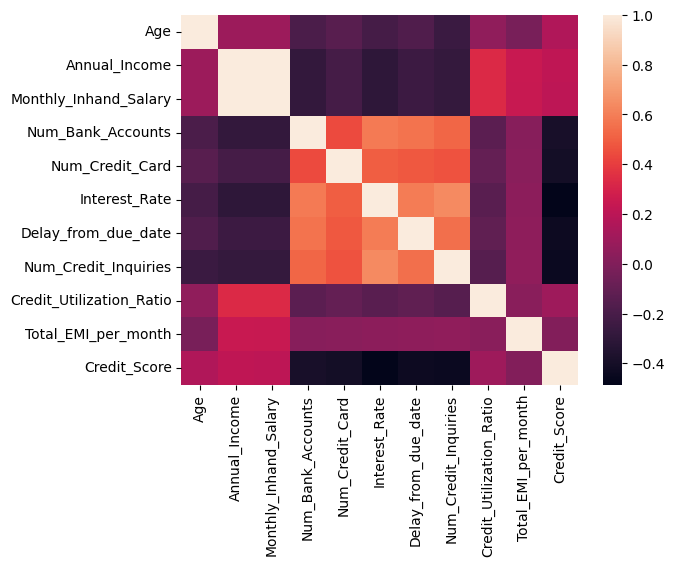

In [32]:
# build heat map of correlation matrix

sns.heatmap(num_columns2.corr()) ;

In [33]:
num_columns2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.312560,10.763924,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4199.890282,3188.480516,303.645417,1626.761667,3096.836667,5964.883333,15204.633333
Num_Bank_Accounts,100000.0,5.369600,2.592987,-1.000000,3.000000,5.000000,7.000000,10.500000
Num_Credit_Card,100000.0,5.534640,2.066834,0.500000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Delay_from_due_date,100000.0,21.062520,14.761850,-2.000000,10.000000,18.000000,28.000000,62.500000
Num_Credit_Inquiries,100000.0,5.794600,3.831618,0.000000,3.000000,5.000000,8.500000,17.000000
Credit_Utilization_Ratio,100000.0,32.302328,2.722979,23.698861,30.346087,32.312732,34.196183,43.774821
Total_EMI_per_month,100000.0,109.924806,236.225101,0.000000,29.524253,66.915017,148.099519,21627.117104


# Visualisation

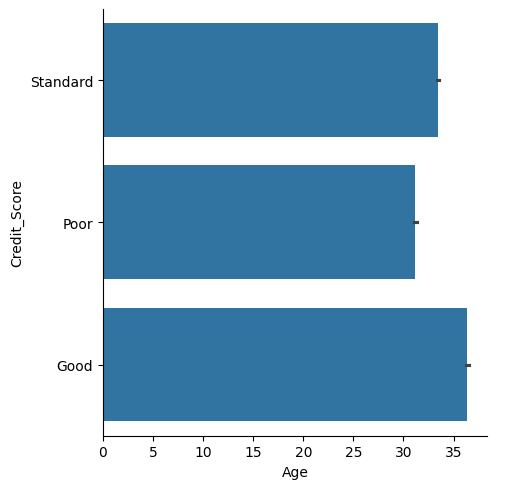

In [34]:
sns.catplot(df, x="Age", y="Credit_Score", kind="bar") ;

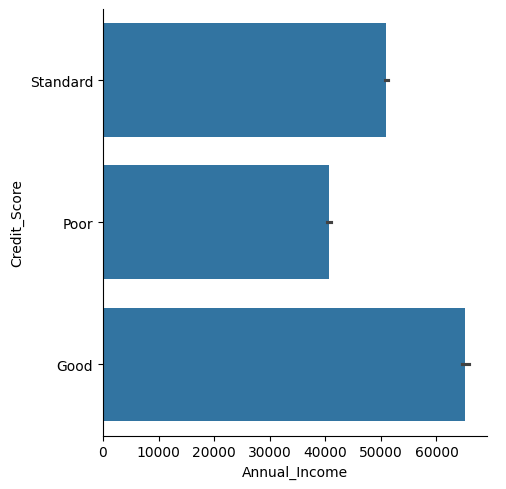

In [35]:
sns.catplot(df, x="Annual_Income", y="Credit_Score", kind="bar") ;

# Model

In [36]:
df1 = df[["Delay_from_due_date", "Occupation", "Annual_Income", "Credit_Score"]]

In [37]:
df1.isna().sum()

Delay_from_due_date    0
Occupation             0
Annual_Income          0
Credit_Score           0
dtype: int64

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Delay_from_due_date  100000 non-null  float64
 1   Occupation           100000 non-null  object 
 2   Annual_Income        100000 non-null  float64
 3   Credit_Score         100000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 3.1+ MB


In [39]:
features_list = df1.columns[0:3]
X = df1[features_list]
y = df1["Credit_Score"]
X

,Delay_from_due_date,Occupation,Annual_Income
0,62.0,Lawyer,30625.94
1,62.0,Lawyer,30625.94
2,62.0,Lawyer,30625.94
3,62.0,Lawyer,30625.94
4,62.0,Lawyer,30625.94
...,...,...,...
99995,23.0,Scientist,41398.44
99996,23.0,Scientist,41398.44
99997,23.0,Scientist,41398.44
99998,23.0,Scientist,41398.44


### Split the data in train and test sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 3), (20000, 3), (80000,), (20000,))

In [41]:
print("X_train before processing")
print(X_train)
print(X_train.shape)

numeric_features = [0,2]
numeric_transformer = StandardScaler()
## standardise the numercial values

categorical_features = [1]
categorical_transformer = OneHotEncoder()
## alternatively we can drop the first column

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
)

X_train = featureencoder.fit_transform(X_train)
X_test = featureencoder.transform(X_test)

print("X_train after processing")
print(X_train)
print(X_train.shape)

X_train before processing
       Delay_from_due_date     Occupation  Annual_Income
43955                  5.0         Writer      144881.68
57951                 12.0        Unknown       38873.01
9348                   7.0  Media_Manager      125873.84
82911                  5.0        Unknown      118386.40
75670                 15.0         Doctor      120091.92
...                    ...            ...            ...
93919                 16.0        Unknown       51477.80
47298                 23.0     Journalist       12303.09
77109                 10.0         Writer      176295.00
99347                 15.0  Media_Manager       14310.25
22768                  9.0     Journalist       29498.09

[80000 rows x 3 columns]
(80000, 3)
X_train after processing
  (0, 15)	1.0
  (0, 16)	-1.087240883231227
  (0, 17)	2.4583530400668288
  (1, 14)	1.0
  (1, 16)	-0.6126946683590462
  (1, 17)	-0.3062112890443327
  (2, 10)	1.0
  (2, 16)	-0.9516562504106039
  (2, 17)	1.9626539954749824
  (3, 14)

In [42]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
classifier.score(X_train, y_train), classifier.score(X_test,y_test)

(0.580825, 0.57735)

In [44]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

In [45]:
y_test_pred = classifier.predict(X_test)
print(y_test_pred[:5])
print()

['Standard' 'Standard' 'Standard' 'Standard' 'Standard']



In [46]:
y_train_pred = classifier.predict(X_train)
print(y_train_pred[0:5])

['Standard' 'Standard' 'Standard' 'Standard' 'Standard']


## F1_score, Precision, Recall

In [47]:
f1_score = f1_score(y_train, y_train_pred, average=None)
f1_score

array([0.20768409, 0.43119319, 0.69148926])

In [48]:
precision = precision_score(y_train, y_train_pred, average=None)
precision

array([0.52517781, 0.64007468, 0.57305802])

In [49]:
recall = recall_score(y_train, y_train_pred, average=None)
recall

array([0.12943486, 0.32510022, 0.87162369])

## Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

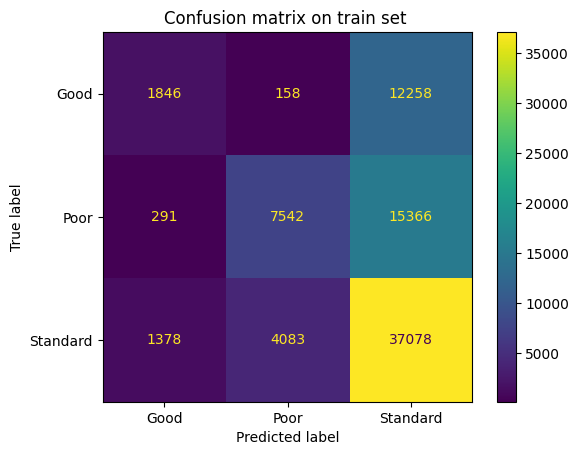

Accuracy-score on train set : 0.581


In [51]:
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") 
plt.show() 
print(f"Accuracy-score on train set : {classifier.score(X_train, y_train):.3f}")

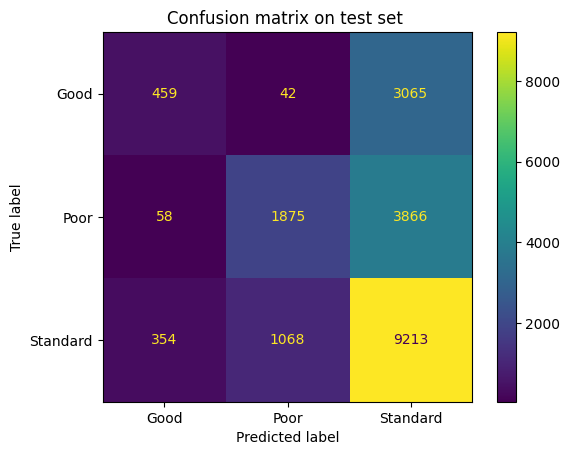

Accuracy-score on test set : 0.577


In [52]:
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 
print(f"Accuracy-score on test set : {classifier.score(X_test, y_test):.3f}")

## Random forest

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
random_forest = RandomForestClassifier(n_estimators = 75, max_depth=20)
random_forest.fit(X_train, y_train)                  # This steps is the actual training
y_train_pred_forest = random_forest.predict(X_train)

In [55]:
print("Score sur Train set ",random_forest.score(X_train, y_train))
print("Score sur Test  set ",random_forest.score(X_test, y_test))

Score sur Train set  0.815375
Score sur Test  set  0.76045


In [56]:
y_test_pred_forest = random_forest.predict(X_test)
print(y_test_pred_forest[:5])
print()

['Standard' 'Poor' 'Good' 'Standard' 'Poor']



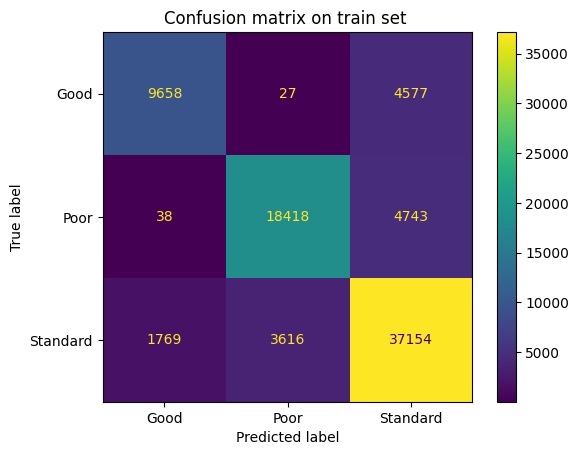

Accuracy-score on train set : 0.815


In [57]:
cm = confusion_matrix(y_train, y_train_pred_forest, labels=random_forest.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_forest)
cm_display.ax_.set_title("Confusion matrix on train set ") 
plt.show() 
print(f"Accuracy-score on train set : {random_forest.score(X_train, y_train):.3f}")

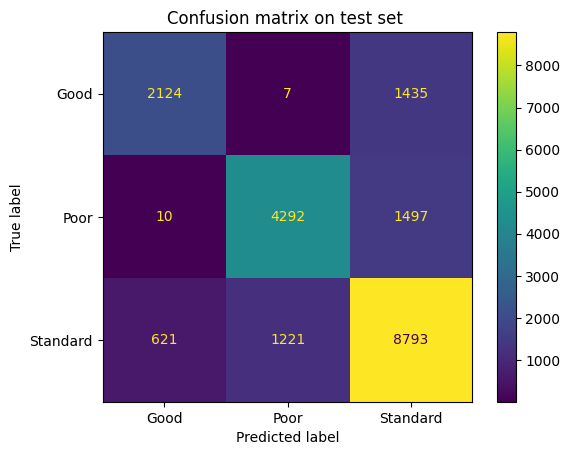

Accuracy-score on test set : 0.760


In [58]:
cm = confusion_matrix(y_test, y_test_pred_forest, labels=random_forest.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_forest)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 
print(f"Accuracy-score on test set : {random_forest.score(X_test, y_test):.3f}")

### If the model is overfit:

Modify the depth of random forest
Modify the number of trees (by default = 100)
Try XGBoost model (sklearn)
Gradient Boosting algorithm

## Feature importance

In [59]:
random_forest.feature_importances_

array([0.00240134, 0.00226267, 0.00241164, 0.00209245, 0.002082  ,
       0.00196469, 0.00266291, 0.00252829, 0.00252909, 0.00203605,
       0.00189255, 0.00226737, 0.00224502, 0.00229945, 0.00179968,
       0.00224854, 0.40580075, 0.5584755 ])

## Testing with XGBoost

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
XGboost = GradientBoostingClassifier()
XGboost.fit(X_train, y_train)                  # This steps is the actual training

y_train_pred_xg = XGboost.predict(X_train)
print("Score on Train set with Gradient Boost",XGboost.score(X_train, y_train))
print("Score on Test  set with Gradient Boost",XGboost.score(X_test, y_test))
y_test_pred_xg = XGboost.predict(X_test)
print(y_test_pred_xg[:5])
print()

Score on Train set with Gradient Boost 0.607275
Score on Test  set with Gradient Boost 0.60105
['Standard' 'Poor' 'Standard' 'Standard' 'Standard']



## Forecasting with real data

In [62]:
forecast = {
    "Delay_from_due_date": [5],
    "Occupation": ["Writer"],
    "Annual_Income": [20000],
}

abc = pd.DataFrame(forecast)
abc = featureencoder.transform(abc)

print(abc[:5])
print()

Score_forecast = random_forest.predict(abc)
print(Score_forecast[:5])

  (0, 15)	1.0
  (0, 16)	-1.087240883231227
  (0, 17)	-0.7983941475686237

['Standard']


In [63]:
forecast = {
    "Delay_from_due_date": [5],
    "Occupation": ["Engineer"],
    "Annual_Income": [20000],
}

abc = pd.DataFrame(forecast)
abc = featureencoder.transform(abc)

print(abc[:5])
print()

Score_forecast = random_forest.predict(abc)
print(Score_forecast[:5])

  (0, 4)	1.0
  (0, 16)	-1.087240883231227
  (0, 17)	-0.7983941475686237

['Good']
